In [1]:
#importing libraries
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import colors as mcolors 
import math 
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading user-rating data file 
movies_rating = pd.read_csv('./data/u1.data', sep='\t')
movies_rating['movieid']=movies_rating['movieid'].astype(int)
 
movies_rating.head()

,userid,movieid,rating,timestamp,gender,occupation,agerange
0,196,242,3,881250949,M,farmer,1
1,186,302,3,891717742,M,farmer,18
2,22,377,1,878887116,F,sales/marketing,1
3,244,51,2,880606923,M,lawyer,25
4,166,346,1,886397596,M,artist,50


In [3]:
#getting average rating of each movie
avgRatingsMovies = movies_rating.groupby('movieid').mean()
avgRatingsMovies.drop(['userid','timestamp','agerange'], axis=1, inplace=True)
avgRatingsMovies.head()

,rating
movieid,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


[Text(0, 0.5, 'Avg. Rating'),
 Text(0.5, 0, 'Movies ID'),
 Text(0.5, 1.0, 'All Movies Average Rating')]

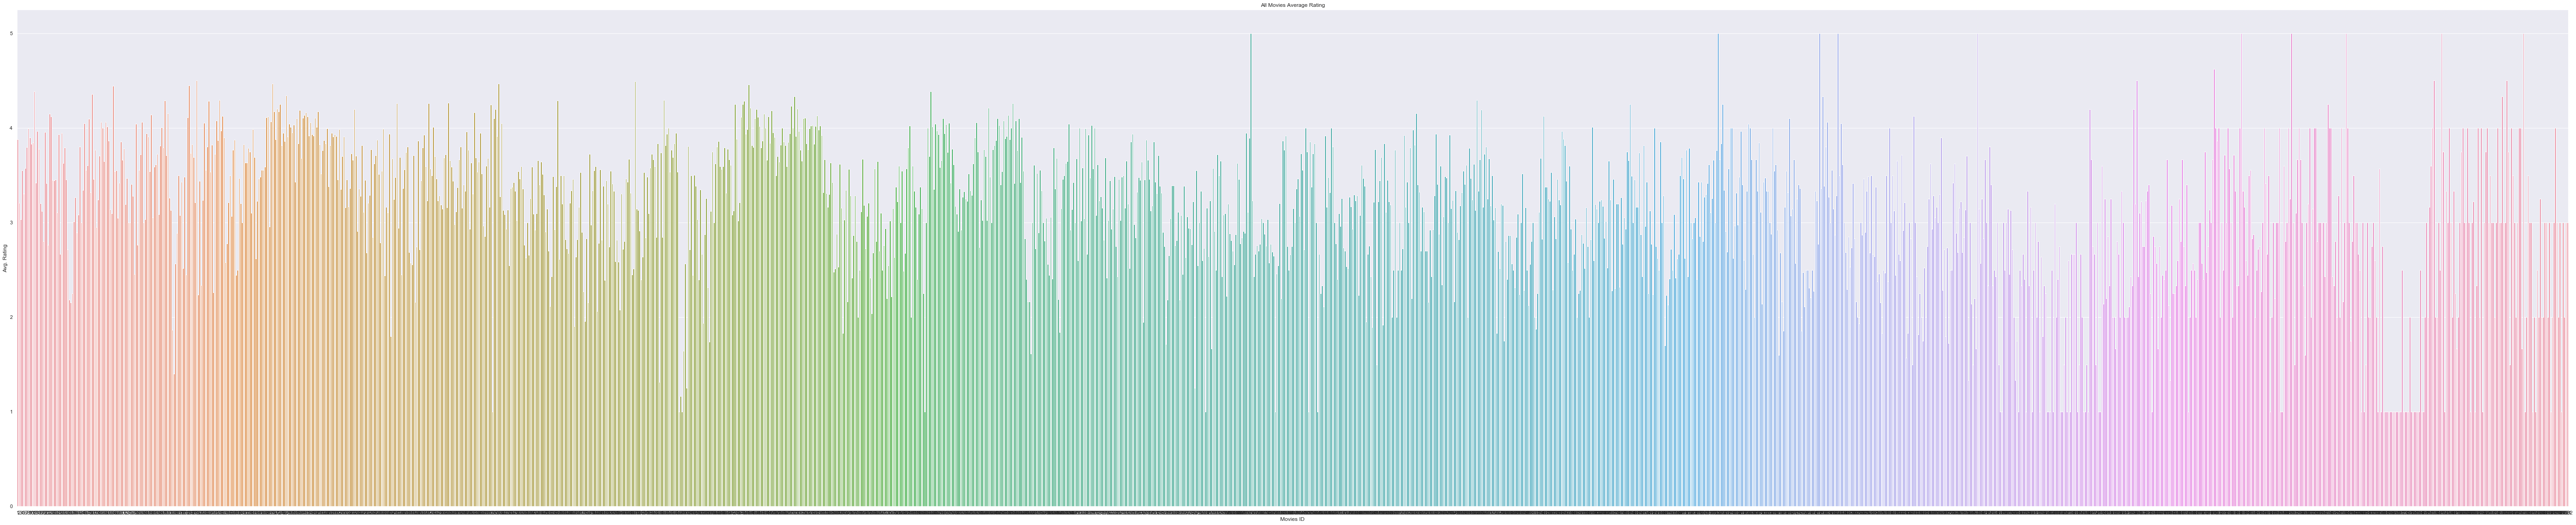

In [4]:
#plotting graph of each movie rating
sns.set(rc={'figure.figsize':(100,20)})
ax = sns.barplot(x=avgRatingsMovies.index, y=avgRatingsMovies.rating)
ax.set(xlabel='Movies ID', ylabel='Avg. Rating', title='All Movies Average Rating')

In [5]:
#reading movies data file 
movies =[]
with open('./data/u.item', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='|')
    for row in reader:
        movies.append(row)
        
movies_df = pd.DataFrame(movies,columns =['movieid','movietitle','releasedate','videoreleasedate','IMDbURL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western'])

display(movies_df.head())

,movieid,movietitle,releasedate,videoreleasedate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Movies List by Genre from 1922 - 1998')]

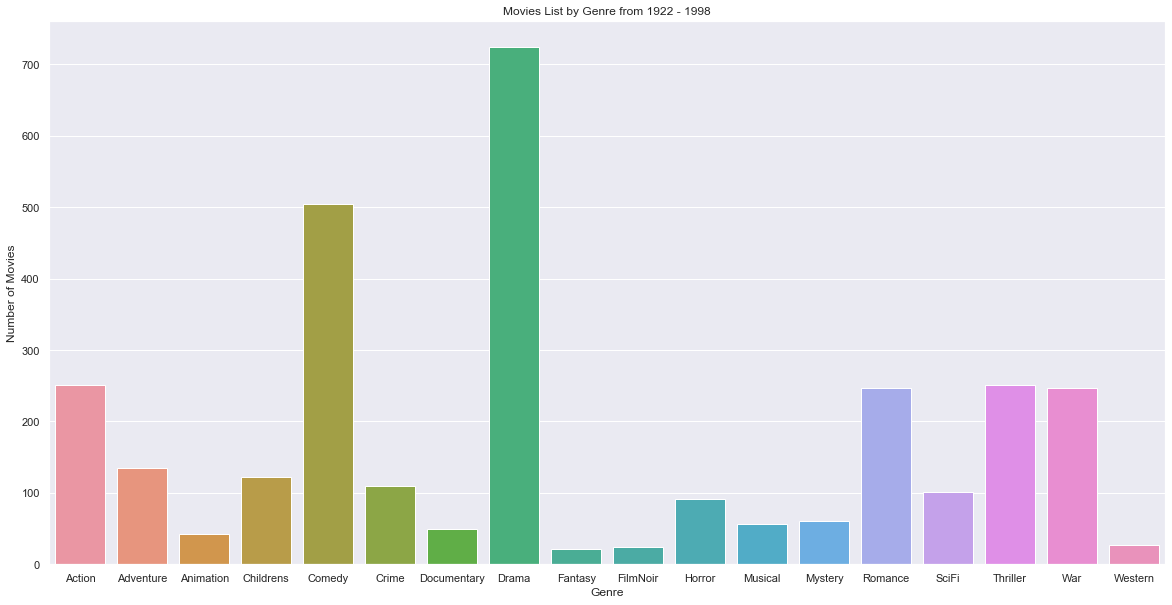

In [6]:
#converting releasedate column into date-time format
movies_df['releasedate']= pd.to_datetime(movies_df['releasedate'])

#converting below columns into type int
movies_df = movies_df.astype({'movieid':int, 'Action':int,'Adventure':int,'Animation':int,'Childrens':int,'Comedy':int,'Crime':int,'Documentary':int,'Drama':int,'Fantasy':int,'FilmNoir':int,'Horror':int,'Musical':int,'Mystery':int,'Romance':int,'SciFi':int,'Thriller':int,'War':int,'Western':int})

#getting sum of movie by genre
Action = sum(movies_df['Action'])
Adventure = sum(movies_df['Adventure'])
Animation = sum(movies_df['Animation'])
Childrens = sum(movies_df['Childrens'])
Comedy = sum(movies_df['Comedy'])
Crime = sum(movies_df['Crime'])
Documentary = sum(movies_df['Documentary'])
Drama = sum(movies_df['Drama'])
Fantasy = sum(movies_df['Fantasy'])
FilmNoir = sum(movies_df['FilmNoir'])
Horror = sum(movies_df['Horror'])
Musical = sum(movies_df['Musical'])
Mystery = sum(movies_df['Mystery'])
Romance = sum(movies_df['Romance'])
SciFi = sum(movies_df['SciFi'])
Thriller = sum(movies_df['Thriller'])
War = sum(movies_df['Romance'])
Western = sum(movies_df['Western'])

genre = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
categoryNumber = [Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western]

#plotting graph by genre
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x=genre, y=categoryNumber)
ax.set(ylabel='Number of Movies', xlabel='Genre', title='Movies List by Genre from 1922 - 1998')

In [7]:
#Merging two data-sets according by movie-id
clusterData = pd.merge(left=movies_rating, right=movies_df, how='left', on='movieid')

display(clusterData)

,userid,movieid,rating,timestamp,gender,occupation,agerange,movietitle,releasedate,videoreleasedate,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,196,242,3,881250949,M,farmer,1,Kolya (1996),1997-01-24,,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,M,farmer,18,L.A. Confidential (1997),1997-01-01,,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,F,sales/marketing,1,Heavyweights (1994),1994-01-01,,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,M,lawyer,25,Legends of the Fall (1994),1994-01-01,,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,M,artist,50,Jackie Brown (1997),1997-01-01,,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,F,sales/marketing,56,"First Wives Club, The (1996)",1996-09-14,,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,M,lawyer,25,Back to the Future (1985),1985-01-01,,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,M,sales/marketing,50,Sliver (1993),1993-01-01,,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,M,self-employed,35,101 Dalmatians (1996),1996-11-27,,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#grouping dataset by occupation, gender and age-range
grp = clusterData.groupby(['occupation','gender','agerange'])[genre].sum()
display(grp)


Action  Adventure  Animation  Childrens  Comedy  \
occupation   gender agerange                                                    
K-12 student F      1             79         41         11         18      87   
                    18            83         47         14         28     105   
                    25            77         43          9         22      90   
                    35            97         54         16         25     126   
                    45            95         43         10         19      97   
...                              ...        ...        ...        ...     ...   
writer       M      25            86         42         19         33      94   
                    35            95         40         15         28     100   
                    45           102         67          6         19      94   
                    50            85         44         13         27     122   
                    56            88         41         10         23     100   

                              Crime  Documentary  Drama  Fantasy  FilmNoir  \
occupation   gender agerange                                                 
K-12 student F      1            23            2    121        4         7   
                    18           26            4    122        3         4   
                    25           30            1    139        4         7   
                    35           35            2    166        4         3   
                    45           26            1    141        1         4   
...                             ...          ...    ...      ...       ...   
writer       M      25           34            5    138        5         6   
                    35           15            1    135        3         3   
                    45           30            1    152        4         5   
                    50           30            3    144        4         8   
                    56           29            2    125        2         8   

                              Horror  Musical  Mystery  Romance  SciFi  \
occupation   gender agerange                                             
K-12 student F      1             16       20       10       58     42   
                    18            22       13       16       78     47   
                    25            20       14       22       73     45   
                    35            20       14       25       73     55   
                    45            15       15       16       73     50   
...                              ...      ...      ...      ...    ...   
writer       M      25            26       21       18       58     45   
                    35            15       22       16       62     51   
                    45            17       13       22       69     46   
                    50            15       19       21       75     39   
                    56            23       16       23       64     40   

                              Thriller  War  Western  
occupation   gender agerange                          
K-12 student F      1               65   35        6  
                    18              77   26        9  
                    25              59   28        3  
                    35              84   51        3  
                    45              81   38        7  
...                                ...  ...      ...  
writer       M      25              86   22       10  
                    35              76   27        6  
                    45              81   37        7  
                    50              78   36        4  
                    56              71   26        5  

[294 rows x 18 columns]

In [9]:
'''
showing movie's genre which is mostly rated/viewed by people of which occupation, gnder and age range
Age -Range
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
'''

maxMovie = grp.max()

mov_genre_occ_gender = []

#Most likely movie by Genre, from occupation, Fender and Age_range

for eachgenre in maxMovie.index:
    r = grp[grp[eachgenre] == grp[eachgenre].max()]
    mov_genre_occ_gender.append([eachgenre,r.index[0][0],r.index[0][1],int(r.index[0][2])])
    
print('\tGenre\t    Occupation\tGender\tAge Range\n')
mov_genre_occ_gender = pd.DataFrame(mov_genre_occ_gender)
print(mov_genre_occ_gender.to_string(index=False, header=False))

	Genre	    Occupation	Gender	Age Range

      Action             scientist  F  18
   Adventure   technician/engineer  F  18
   Animation                 other  F  25
   Childrens            programmer  M  45
      Comedy   technician/engineer  M  35
       Crime            programmer  F   1
 Documentary                 other  F  50
       Drama   tradesman/craftsman  F  35
     Fantasy        clerical/admin  M  35
    FilmNoir             homemaker  M   1
      Horror       sales/marketing  F  56
     Musical               retired  F  18
     Mystery     academic/educator  M  25
     Romance    doctor/health care  M  45
       SciFi  executive/managerial  M  18
    Thriller     academic/educator  M  25
         War                lawyer  M   1
     Western     academic/educator  F  56


[None, None]

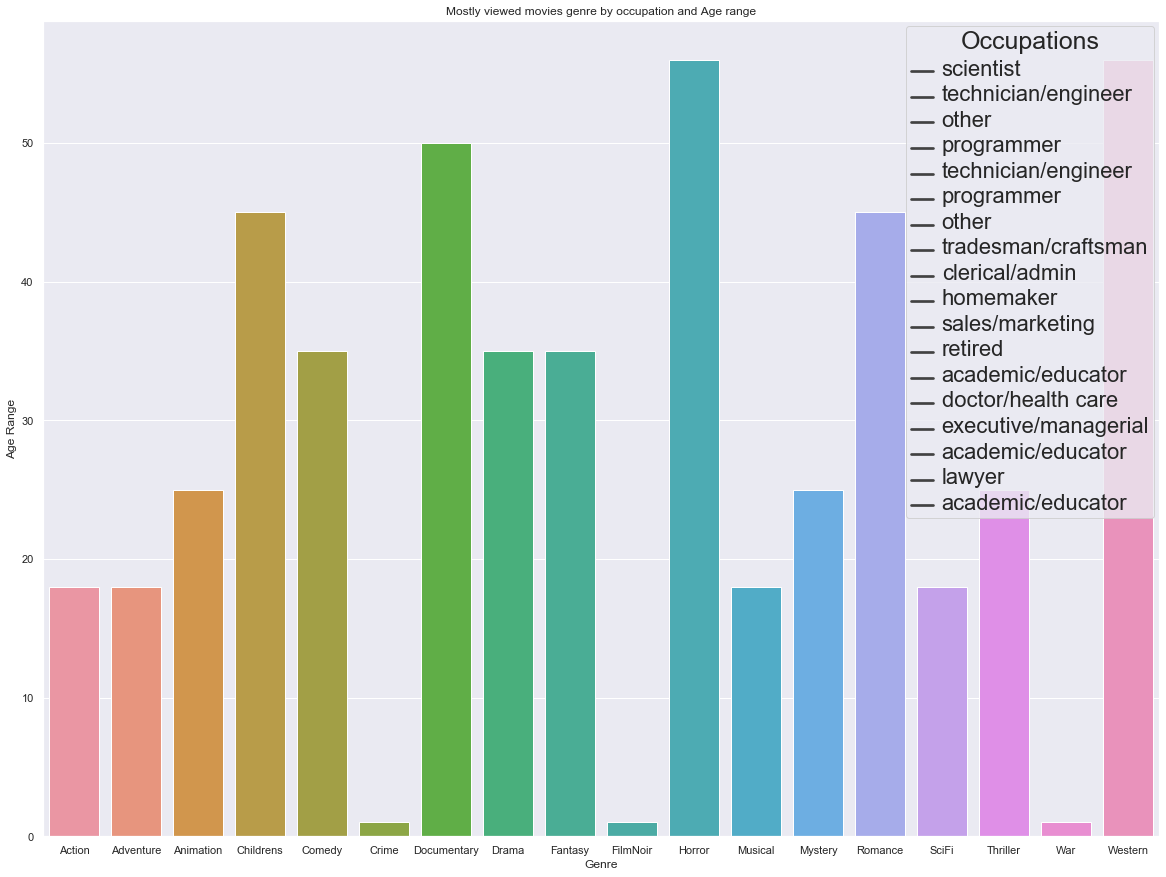

In [10]:
#plotting graph by genre
sns.set(rc={'figure.figsize':(20,15)})

ax = sns.barplot(x=genre, y=mov_genre_occ_gender[3])
ax.set(ylabel='Age Range', xlabel='Genre', title='Mostly viewed movies genre by occupation and Age range')
h, l = ax.get_legend_handles_labels()

ax.legend(title='Occupations', loc='upper right', labels=mov_genre_occ_gender[1],markerscale=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title


In [11]:
#Options1 for users
'''
suppose a user wants to find out which movie's genre mostly like by a 'Female homemaker of age b/w 35-44)'

Age -Range
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
    
#The result would be like below 
'''

occupation = 'homemaker'
gender = 'F'
agerange  = '35'

if gender == 'M':
    gen = 'Male'
else:
    gen = 'Female'
    
mov_gen = max(grp.loc[(grp.index.get_level_values('occupation') == occupation) & 
                (grp.index.get_level_values('gender') == gender) & 
                (grp.index.get_level_values('agerange') == agerange)])

print(gen,occupation, 'of age range',agerange,'likes',mov_gen,'movies')

Female homemaker of age range 35 likes Western movies


In [12]:
#Options2 for users
'''
suppose a user wants to find out what type of peoples like crime type movies
'''

mov_gen = 'Crime'

r = grp[grp[mov_gen] == grp[mov_gen].max()].index

if r[0][1] == 'M':
    gen = 'Male'
else:
    gen = 'Female'
  
print(mov_gen, 'type movies mostly watched by', gen, r[0][0], 'of age range', r[0][2])


Crime type movies mostly watched by Female programmer of age range 1


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
releasedate,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995.0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996.0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


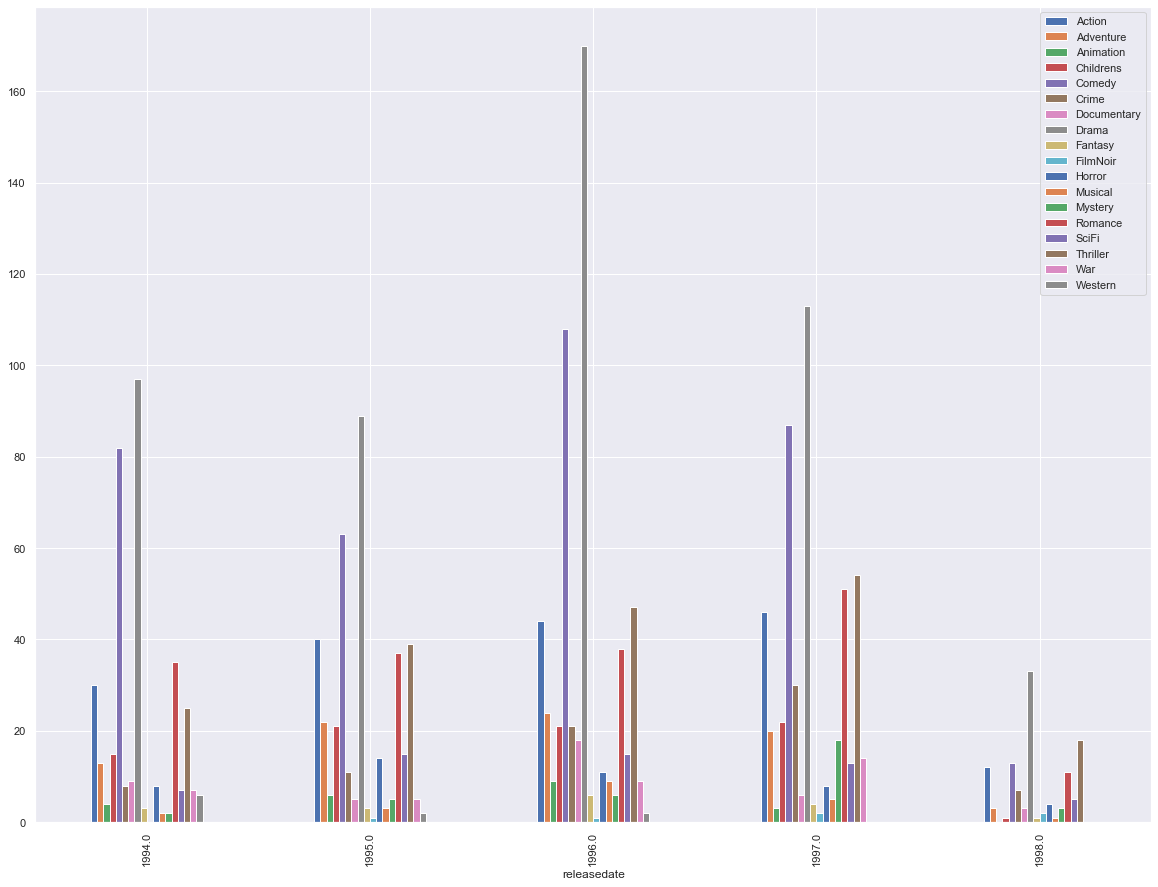

In [13]:
#converting release date into year
movies_df['releasedate']= movies_df['releasedate'].dt.year

#group by year and sum of all movies by year
movies_df = movies_df.groupby(['releasedate'])[genre].sum()

display(movies_df)
#getting number of movies between 1990 and 1998
movies_1990s = movies_df[(movies_df.index >= 1994) & (movies_df.index <= 1998) ]
movies_1990s.plot(kind="bar")

,x,y
releasedate,,
1922.0,1922.0,0
1926.0,1926.0,1
1930.0,1930.0,1
1931.0,1931.0,0
1932.0,1932.0,0
...,...,...
1994.0,1994.0,97
1995.0,1995.0,89
1996.0,1996.0,170


array([[1.97715152e+03, 4.33333333e+00],
       [1.99500000e+03, 1.06600000e+02],
       [1.94372727e+03, 1.48484848e+00]])

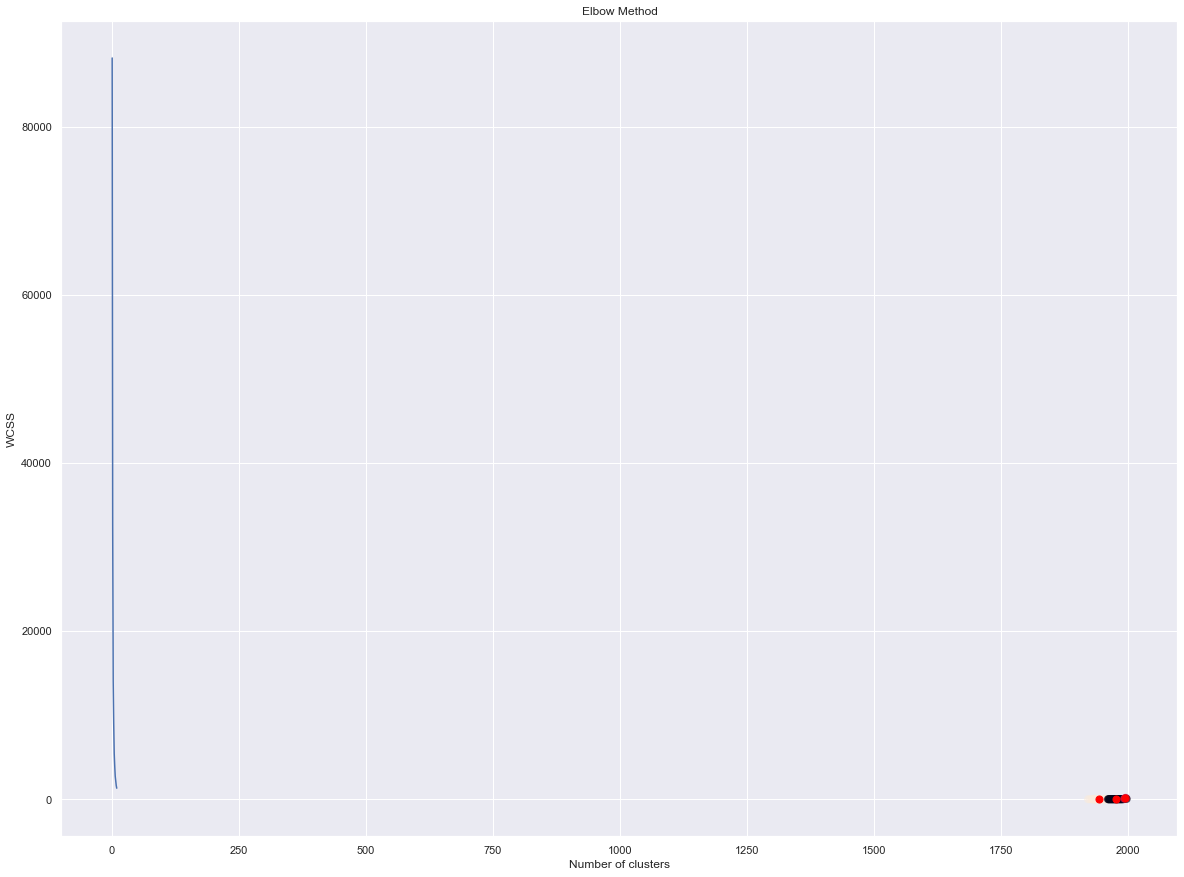

In [14]:
#clustering with Elbow Method

#taking two-dimensional data i.e. year and Drama movie(because No. of drama movie is more)
Data = {'x': movies_df.index,
        'y':  movies_df.Drama}

df = pd.DataFrame(Data,columns=['x','y'])

display(df)
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
display(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


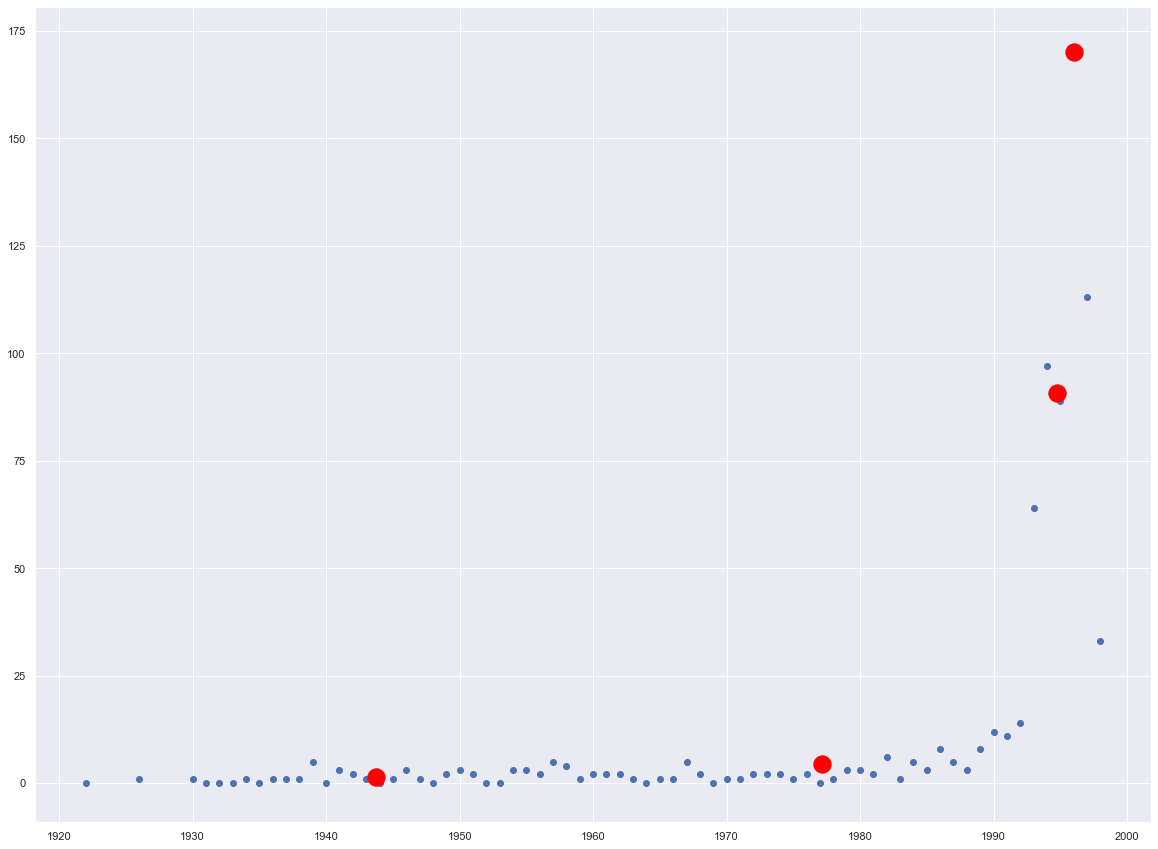

In [15]:
#k-mean
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['x'], df['y'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

array([ 8,  8,  8,  8,  8,  8,  9,  9,  8,  9,  8, 11,  0, 14,  8,  8, 14,
       14, 14,  8,  8, 14, 14, 14,  9,  9,  0, 14,  8, 11, 14,  0,  0, 14,
       14, 14,  9,  9,  8, 11, 14,  8,  8,  0,  8,  8,  0,  0, 14,  9,  9,
       16, 16, 12, 16,  8, 16, 16, 10, 17,  0, 10,  7, 13, 15,  3,  1,  6,
        2,  4,  5])

,0,1,2
0,-14.337494,-0.303122,0.077234
1,-13.674938,-0.846332,-0.315926
2,-13.674938,-0.846332,-0.315926
3,-14.035850,0.386034,-0.586684
4,-14.113511,0.181822,0.434203


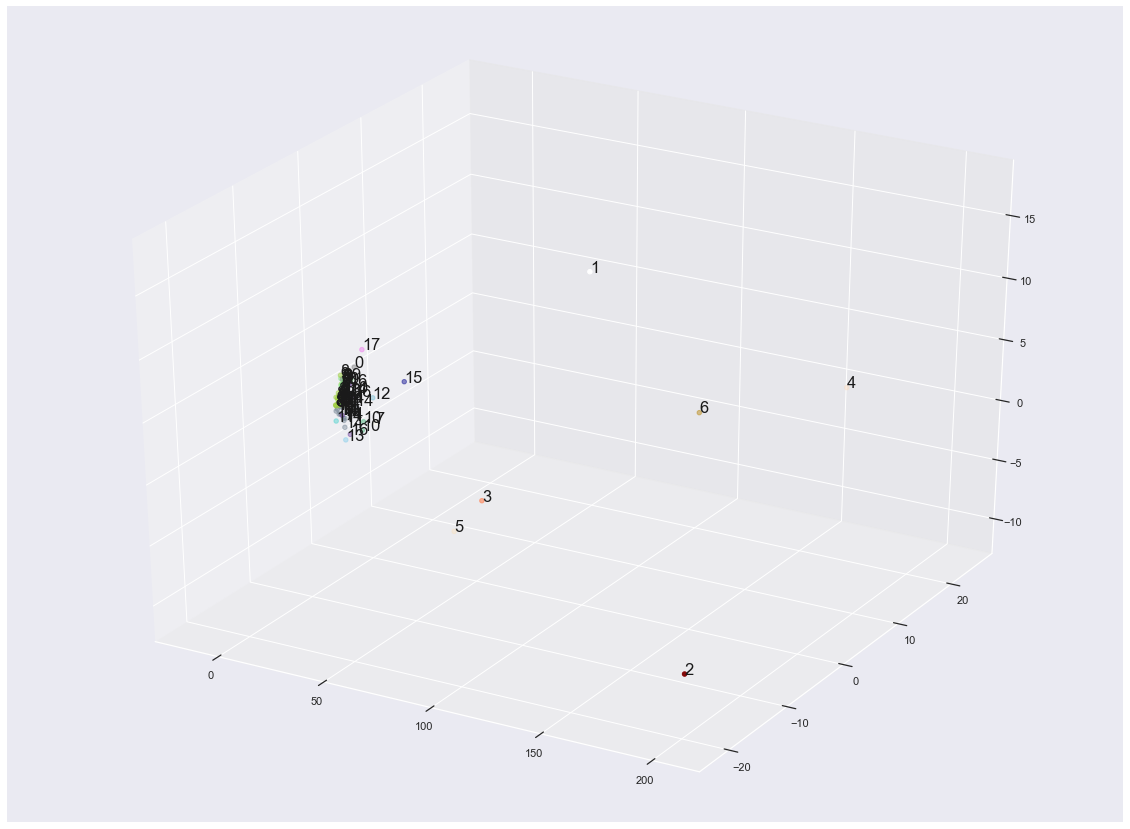

In [16]:
'''
Multidimensional dimensional data
'''
clusters = 18
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(movies_df) 
  
display(kmeans.labels_)
pca = PCA(3) 
pca.fit(movies_df) 
  
pca_data = pd.DataFrame(pca.transform(movies_df)) 
  
display(pca_data.head())

   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

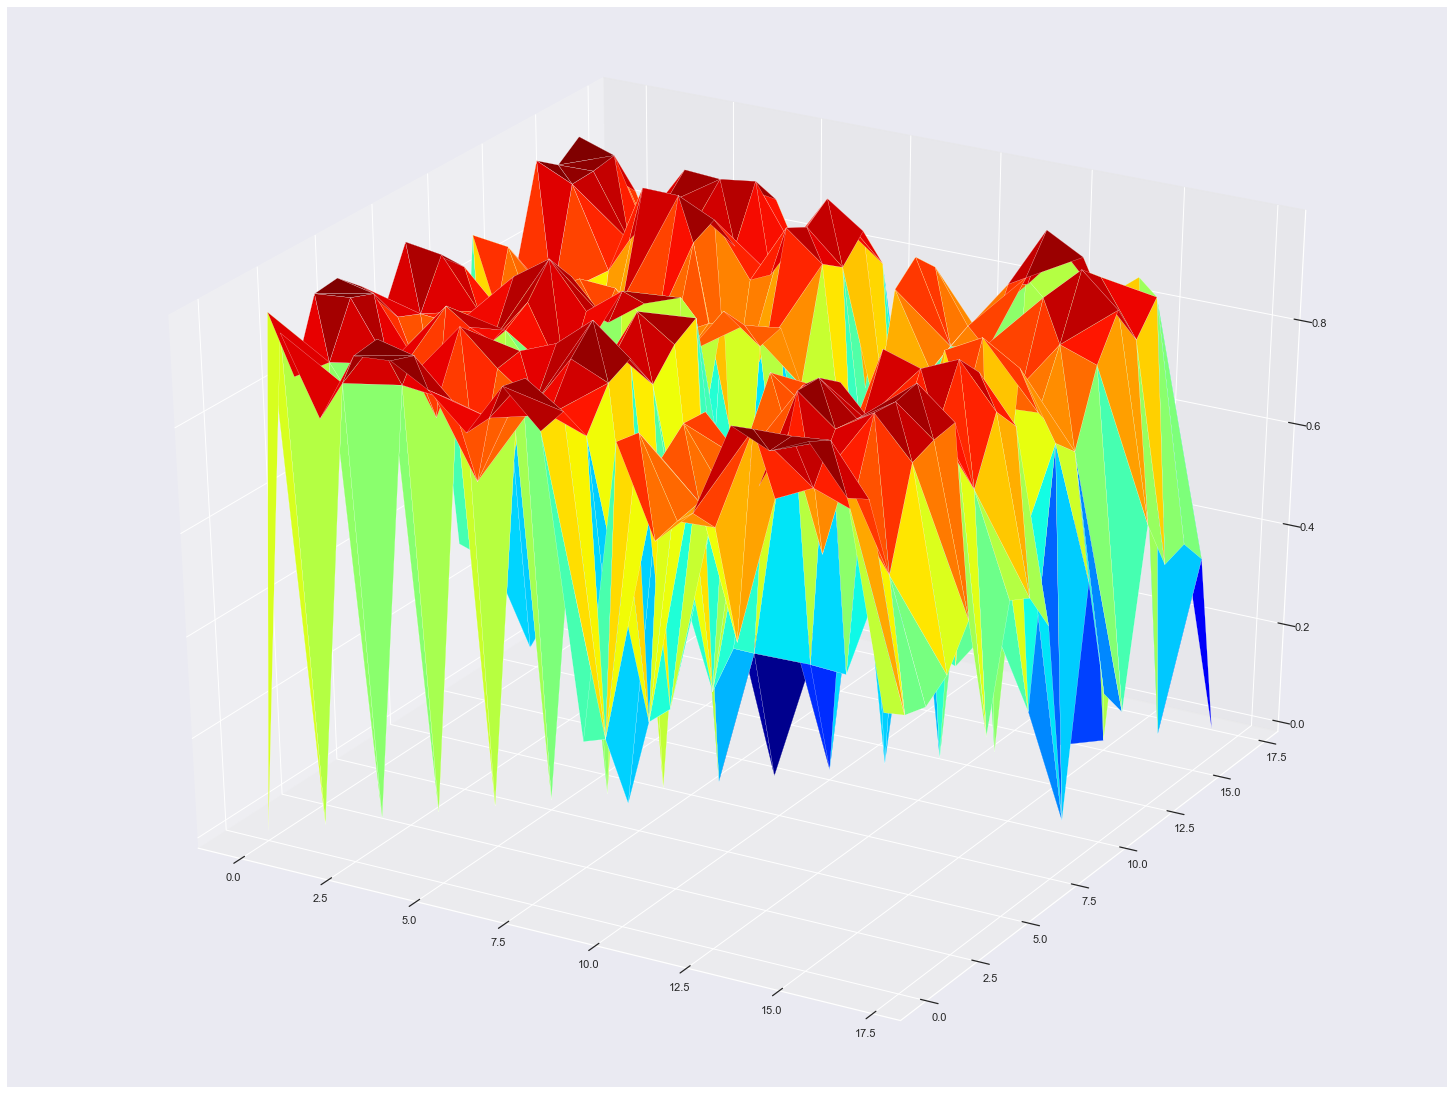

In [17]:
# generating correlation data 
df = movies_df.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 